# Cleaning Visualisations

## Data Loading & Exploration

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = sns.load_dataset('titanic')

In [11]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [12]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [17]:
print(df['embarked'].unique())

['S' 'C' 'Q' nan]


## Data Cleaning

### 1. Fill missing embarked with the most frequent value

In [30]:
embarked_most_frequent = df.embarked.mode()
df['embarked'].fillna(embarked_most_frequent, inplace=True)
print(df['embarked'].isna().sum())

2


### 2. Convert sex and class to categorical type.

In [32]:
categorical_cols=['sex', 'class']
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.7+ KB


### 3. Create a new column family_size= sibsp + parch + 1.

In [45]:
df['family_size'] = df.sibsp + df.parch + 1

df.groupby('family_size')[['sibsp', 'parch']].head(1)


,sibsp,parch
0,1,0
2,0,0
7,3,1
8,0,2
13,1,5
16,4,1
43,1,2
59,5,2
159,8,2


### 4. Cap fare at the 99th percentile to reduce outlier impact

In [47]:
df_fare = df['fare'].quantile(0.99)
df['fare_capped'] = df['fare'].clip(upper=df_fare)
df.describe()

,survived,pclass,age,sibsp,parch,fare,family_size,fare_capped
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,31.224767
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,42.524125
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,249.006220


## Visualization

### 1. Pairplot of ['age', 'fare', 'sibsp'] colored by survived

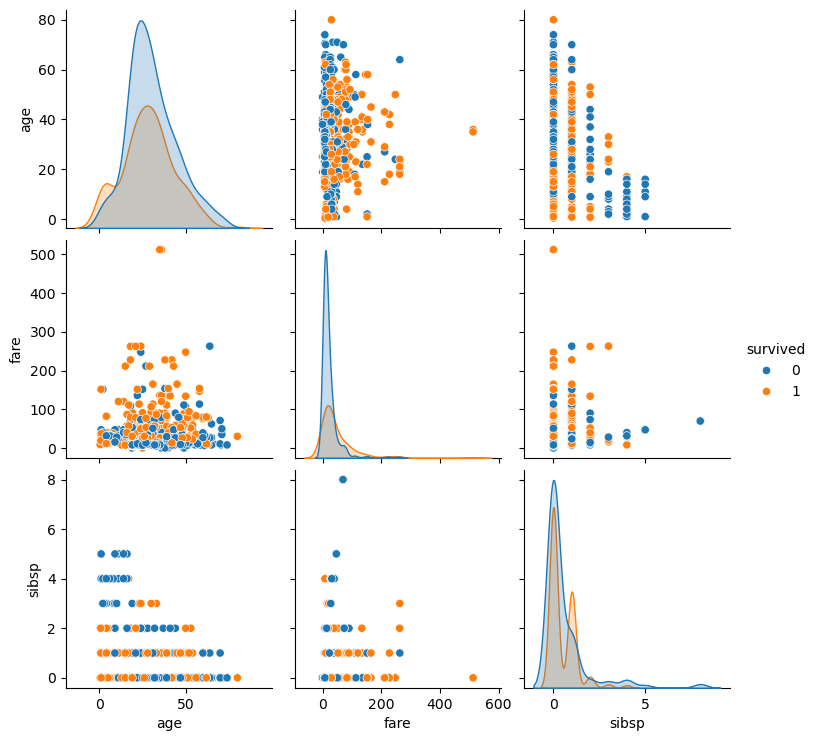

In [50]:
sns.pairplot(df, vars=['age', 'fare', 'sibsp'], hue='survived')

### 2. Heatmap of correlations for numeric columns

<Axes: >

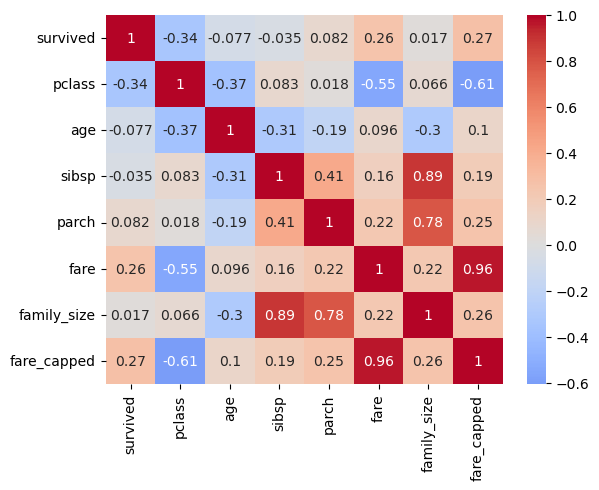

In [53]:
num_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)

###  3. Scatter plot of age vs fare, colored by survived. 

<Axes: xlabel='age', ylabel='fare_capped'>

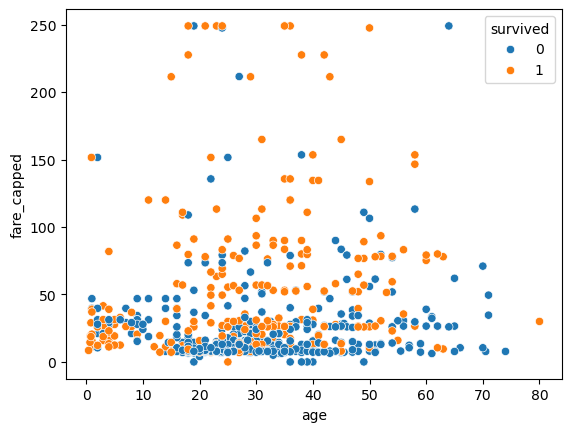

In [52]:
sns.scatterplot(x='age', y='fare_capped', hue='survived', data=df)

### 4. Plot a histogram of age with 30 bins and KDE

<Axes: xlabel='age', ylabel='Count'>

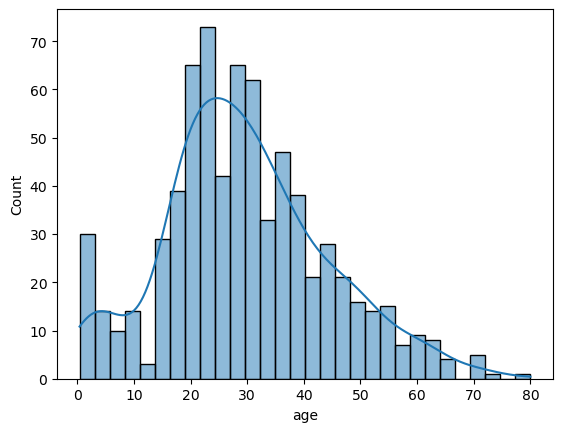

In [55]:
sns.histplot(data=df, x='age', bins=30, kde=True)